<a href="https://colab.research.google.com/github/arianza1210/ComputerVision/blob/main/bismillah_MobileNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import PIL
import os
from PIL import Image, ImageOps
import glob
import cv2

In [4]:
import os, re, glob, cv2, numpy as np

dirs = os.listdir('/content/drive/MyDrive/Dataset_CNN/Augmentasi/kupu_kupu/flip')
label = 0
im_arr = []
lb_arr = []
X = []
y = []
for i in dirs: #loop all directory
    count = 0
    for pic in glob.glob('/content/drive/MyDrive/Dataset_CNN/Augmentasi/kupu_kupu/flip/'+i+'/*'):
        im = cv2.imread(pic)
        im = cv2.resize(im,(224,224))
        im = np.array(im)
        count = count + 1
        X.append(im)
        y.append(label)
        if(count <= 10):
            im_arr.append({str(i):im})
    print("Jumlah "+str(i)+" : "+str(count))
    label = label + 1
    lb_arr.append(i)
X = np.array(X)
y = np.array(y);

Jumlah kupu_batik_cap : 300
Jumlah kupu_harimau_kuning_hijau : 300
Jumlah kupu_jojo : 300
Jumlah kupu_pantat_merah : 300
Jumlah kupu_hijau_biru : 300
Jumlah kupu_jarak : 300
Jumlah kupu_raja_helena : 300
Jumlah kupu_raja_limau : 300


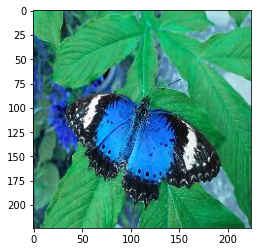

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X[1])

In [29]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X_train, X_other, y_train, y_other = train_test_split(X, y, train_size=0.70, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_other, y_other, test_size=0.666, random_state=42)
X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_valid /= 255
X_test /= 255
y_train = to_categorical(y_train, len(dirs))
y_valid = to_categorical(y_valid, len(dirs))
y_test = to_categorical(y_test, len(dirs))
print("Found "+str(X_train.shape[0])+" trained image filenames belonging "+str(len(dirs))+" class")
print("Found "+str(X_valid.shape[0])+" validated image filenames belonging "+str(len(dirs))+" class")
print("Found "+str(X_test.shape[0])+" tested image filenames belonging "+str(len(dirs))+" class")

Found 1680 trained image filenames belonging 8 class
Found 240 validated image filenames belonging 8 class
Found 480 tested image filenames belonging 8 class


In [30]:
input_shape = (224, 224, 3)
base_model=tf.keras.applications.MobileNet(input_shape=input_shape,
                                           dropout=0.001,
                                           include_top=False,
                                           weights='imagenet')

In [31]:

base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [32]:

model = tf.keras.Sequential([
                             base_model,
                             tf.keras.layers.Conv2D(32,3, activation='relu'),
                             tf.keras.layers.GlobalAveragePooling2D(),
                             tf.keras.layers.Dense(8,activation='softmax')
])



In [33]:
from tensorflow.keras.optimizers import Adam
epochs = 10
lrate = 0.001
adam = Adam(learning_rate=lrate)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 5, 5, 32)          294944    
                                                                 
 global_average_pooling2d_9   (None, 32)               0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_9 (Dense)             (None, 8)                 264       
                                                                 
Total params: 3,524,072
Trainable params: 3,502,184
Non-trainable params: 21,888
_________________________________________________________________


In [34]:
#tanpa augmentasi
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
53/53 [==============================] - 367s 7s/step - loss: 0.2811 - accuracy: 0.9268 - val_loss: 1.4116 - val_accuracy: 0.8062
Epoch 2/10
53/53 [==============================] - 357s 7s/step - loss: 0.0241 - accuracy: 0.9923 - val_loss: 1.2534 - val_accuracy: 0.8396
Epoch 3/10
53/53 [==============================] - 357s 7s/step - loss: 0.1205 - accuracy: 0.9750 - val_loss: 5.1015 - val_accuracy: 0.6479
Epoch 4/10
53/53 [==============================] - 364s 7s/step - loss: 0.1199 - accuracy: 0.9756 - val_loss: 0.2152 - val_accuracy: 0.9292
Epoch 5/10
53/53 [==============================] - 362s 7s/step - loss: 0.1070 - accuracy: 0.9798 - val_loss: 5.5213 - val_accuracy: 0.5542
Epoch 6/10
53/53 [==============================] - 364s 7s/step - loss: 0.0406 - accuracy: 0.9845 - val_loss: 2.5880 - val_accuracy: 0.7396
Epoch 7/10
53/53 [==============================] - 356s 7s/step - loss: 0.0760 - accuracy: 0.9887 - val_loss: 1.1345 - val_accuracy: 0.9104
Epoch 8/10
53

In [35]:
# Evaluate accuracy
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=1)

print('\nTest accuracy:', test_acc)

15/15 [==============================] - 17s 1s/step - loss: 3.3924e-06 - accuracy: 1.0000

Test accuracy: 1.0


In [36]:
train_loss, train_acc = model.evaluate(X_train,  y_train, verbose=1)

print('\nTrain accuracy:', train_acc)

53/53 [==============================] - 59s 1s/step - loss: 5.1515e-07 - accuracy: 1.0000

Train accuracy: 1.0


In [37]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

<Figure size 432x288 with 0 Axes>

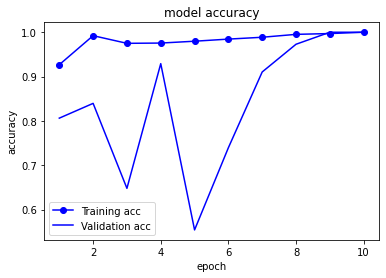

In [38]:
plot_epochs = range(1, len(acc)+1)
# Accuracy
plt.plot(plot_epochs, acc, 'bo-', label='Training acc')
plt.plot(plot_epochs, val_acc, 'b', label='Validation acc')
plt.title('model accuracy')
plt.ylabel('accuracy')  #Y-axis label
plt.xlabel('epoch')  #X-axis label
plt.legend()
plt.show()

In [39]:
loss = history.history['loss']
val_loss = history.history['val_loss']

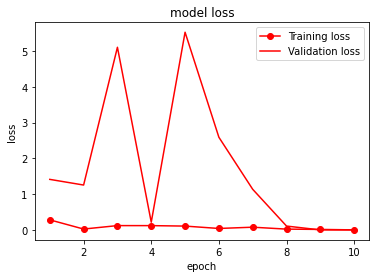

In [40]:
plot_epochs = range(1, len(loss)+1)
# Accuracy
plt.plot(plot_epochs, loss, 'ro-', label='Training loss')
plt.plot(plot_epochs, val_loss, 'r', label='Validation loss')
plt.title('model loss')
plt.ylabel('loss')  #Y-axis label
plt.xlabel('epoch')  #X-axis label
plt.legend()
plt.show()

In [41]:
y_pred = model.predict(X_test)

In [42]:
y_prediction_n = []
y_test_n = []
for i in range(0, len(y_pred)):
  max_n = max(y_pred[i])
  max_m = max(y_test[i])
  index_n = [index_n for index_n, j in enumerate(y_pred[i]) if j == max_n]
  index_m = [index_m for index_m, j in enumerate(y_test[i]) if j == max_m]
  y_prediction_n.append(index_n)
  y_test_n.append(index_m)

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test_n, y_prediction_n, 
                            target_names=["kupu_harimau_kuning_hijau",
                                          "kupu_raja_helena",
                                          "kupu_hijau_biru",
                                          "kupu_batik_cap",
                                          "kupu_jarak",
                                          "kupu_raja_limau",
                                          "kupu_jojo",
                                          "kupu_pantat_merah"]))

                           precision    recall  f1-score   support

kupu_harimau_kuning_hijau       1.00      1.00      1.00        65
         kupu_raja_helena       1.00      1.00      1.00        63
          kupu_hijau_biru       1.00      1.00      1.00        56
           kupu_batik_cap       1.00      1.00      1.00        56
               kupu_jarak       1.00      1.00      1.00        66
          kupu_raja_limau       1.00      1.00      1.00        63
                kupu_jojo       1.00      1.00      1.00        47
        kupu_pantat_merah       1.00      1.00      1.00        64

                 accuracy                           1.00       480
                macro avg       1.00      1.00      1.00       480
             weighted avg       1.00      1.00      1.00       480



In [44]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_pred


array([2, 1, 6, 7, 0, 2, 3, 7, 5, 3, 7, 1, 3, 4, 5, 6, 3, 7, 0, 4, 0, 6,
       3, 0, 1, 0, 7, 5, 2, 1, 4, 4, 6, 6, 5, 6, 1, 1, 4, 1, 3, 4, 3, 1,
       2, 7, 0, 6, 4, 0, 0, 6, 7, 4, 3, 0, 1, 7, 1, 5, 7, 5, 2, 6, 1, 4,
       4, 2, 1, 1, 3, 4, 2, 5, 6, 2, 3, 4, 7, 7, 0, 6, 5, 1, 3, 5, 3, 5,
       4, 7, 0, 7, 0, 6, 1, 7, 7, 2, 5, 4, 1, 7, 5, 2, 1, 7, 0, 0, 3, 2,
       3, 4, 4, 4, 4, 1, 4, 5, 5, 5, 3, 0, 2, 0, 3, 4, 7, 5, 5, 4, 6, 1,
       3, 4, 0, 3, 6, 4, 4, 2, 6, 5, 7, 4, 0, 4, 5, 4, 7, 0, 6, 7, 4, 4,
       7, 0, 4, 5, 2, 2, 6, 5, 6, 6, 2, 6, 1, 5, 4, 5, 3, 1, 5, 6, 3, 1,
       7, 6, 7, 7, 7, 2, 1, 1, 1, 7, 4, 4, 2, 3, 0, 2, 7, 0, 0, 3, 0, 2,
       0, 4, 4, 5, 5, 4, 6, 2, 0, 3, 3, 4, 0, 5, 0, 4, 5, 1, 3, 5, 1, 3,
       4, 1, 2, 5, 0, 0, 7, 4, 0, 2, 4, 7, 1, 1, 5, 5, 4, 2, 5, 5, 2, 4,
       3, 1, 2, 3, 7, 5, 4, 7, 5, 2, 6, 7, 7, 2, 1, 4, 7, 2, 6, 7, 3, 3,
       1, 3, 1, 3, 7, 2, 2, 4, 1, 7, 5, 0, 0, 5, 4, 7, 0, 0, 5, 2, 6, 5,
       0, 7, 7, 0, 1, 5, 1, 4, 7, 7, 6, 2, 4, 4, 1,

In [45]:
y_test_class = np.argmax(y_test, axis=1)

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn
print(accuracy_score(y_test_class, y_pred))
confusion_matrix(y_test_class, y_pred)

1.0


array([[65,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 63,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 56,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 56,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 66,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 63,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 47,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 64]])

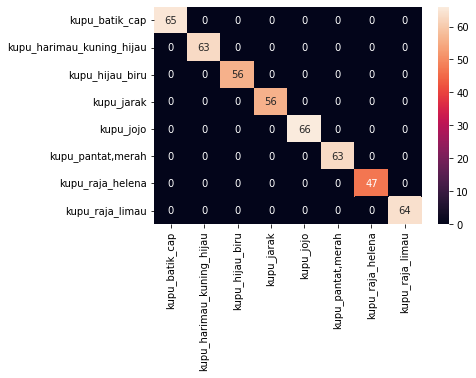

In [47]:
cm = confusion_matrix(y_test_class, y_pred)
sn.heatmap(cm, annot=True, xticklabels=["kupu_batik_cap",
                                          "kupu_harimau_kuning_hijau",
                                          "kupu_hijau_biru",
                                          "kupu_jarak",
                                          "kupu_jojo",
                                          "kupu_pantat,merah",
                                          "kupu_raja_helena",
                                          "kupu_raja_limau"], 
           yticklabels=["kupu_batik_cap",
                                          "kupu_harimau_kuning_hijau",
                                          "kupu_hijau_biru",
                                          "kupu_jarak",
                                          "kupu_jojo",
                                          "kupu_pantat,merah",
                                          "kupu_raja_helena",
                                          "kupu_raja_limau"])

In [48]:
y_pred = model.predict(X_valid)
y_prediction_n = []
y_valid_n = []
for i in range(0, len(y_pred)):
  max_n = max(y_pred[i])
  max_m = max(y_valid[i])
  index_n = [index_n for index_n, j in enumerate(y_pred[i]) if j == max_n]
  index_m = [index_m for index_m, j in enumerate(y_valid[i]) if j == max_m]
  y_prediction_n.append(index_n)
  y_valid_n.append(index_m)

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_valid_n, y_prediction_n, target_names=["Kupu Batik Cap", 
                                                                     "Kupu Harimau Kuning Hijau", "Kupu Hijau Biru", 
                                                                     "Kupu Jarak", "Kupu Jojo", "Kupu Pantat Merah", 
                                                                     "Kupu Raja Helena", "Kupu Raja Limau"]))

                           precision    recall  f1-score   support

           Kupu Batik Cap       1.00      1.00      1.00        32
Kupu Harimau Kuning Hijau       1.00      1.00      1.00        37
          Kupu Hijau Biru       1.00      1.00      1.00        27
               Kupu Jarak       1.00      1.00      1.00        30
                Kupu Jojo       1.00      1.00      1.00        28
        Kupu Pantat Merah       1.00      1.00      1.00        23
         Kupu Raja Helena       1.00      1.00      1.00        35
          Kupu Raja Limau       1.00      1.00      1.00        28

                 accuracy                           1.00       240
                macro avg       1.00      1.00      1.00       240
             weighted avg       1.00      1.00      1.00       240

